# Exploring Dandiset 001174: Calcium imaging in SMA and M1 of macaques

**Disclaimer:** This notebook was AI-generated and has not been fully verified. Please be cautious when interpreting the code or results. Consult the original dataset and related publications for definitive information.

## Overview of the Dandiset

This notebook explores Dandiset [001174](https://dandiarchive.org/dandiset/001174/0.250331.2218), titled "Calcium imaging in SMA and M1 of macaques".

**Description from DANDI:** The study of motor cortices in non-human primates is relevant to our understanding of human motor control, both in healthy conditions and in movement disorders. Calcium imaging and miniature microscopes allow the study of multiple genetically identified neurons with excellent spatial resolution. We used this method to examine activity patterns of projection neurons in deep layers of the supplementary motor (SMA) and primary motor areas (M1) in four rhesus macaques. We implanted gradient index lenses and expressed GCaMP6f to image calcium transients while the animals were at rest or engaged in an arm reaching task. We tracked the activity of SMA and M1 neurons across conditions, examined cell pairs for synchronous activity, and assessed whether SMA and M1 neuronal activation followed specific sequential activation patterns. We demonstrate the value of in vivo calcium imaging for studying patterns of activity in groups of corticofugal neurons in SMA and M1.

**Citation:** Galvan, Adriana; Martel, Anne-Caroline; Pittard, Damien; Devergnas, Annaelle; Risk, Benjamin; Nassi, Jonathan J.; Yu, Waylin; Downer, Joshua D. ; Wichmann, Thomas (2025) Calcium imaging in SMA and M1 of macaques (Version 0.250331.2218) [Data set]. DANDI Archive. https://doi.org/10.48324/dandi.001174/0.250331.2218

**Keywords:** One-photon calcium imaging, non-human primates, microendoscope, reaching task, neuronal coactivation, calcium sensors, GCaMP, GRIN lens

## Notebook Summary

This notebook will cover the following:

1.  **Listing Required Packages:** Essential Python libraries for running the notebook.
2.  **Loading the Dandiset:** How to connect to the DANDI archive and access Dandiset 001174.
3.  **Exploring NWB File Contents:** Loading a specific NWB file from the Dandiset and examining its metadata and structure.
4.  **Data Visualization:** Examples of how to load and visualize different types of data within the NWB file, including:
    *   Raw imaging data (OnePhotonSeries)
    *   ROI fluorescence traces (RoiResponseSeries)
    *   ROI spatial footprints (image masks)
5.  **Summary and Future Directions:** A brief recap and suggestions for further analysis.

## Required Packages

The following Python packages are required to run this notebook. It is assumed they are already installed on your system.

*   `dandi` (for interacting with the DANDI Archive)
*   `pynwb` (for reading NWB files)
*   `h5py` (for interacting with HDF5 files, used by NWB)
*   `remfile` (for streaming remote HDF5 files)
*   `numpy` (for numerical operations)
*   `matplotlib` (for plotting)
*   `seaborn` (for enhanced plotting styles)
*   `pandas` (for data manipulation, particularly for table-like data from NWB)

## 1. Loading the Dandiset using the DANDI API

In [1]:
from itertools import islice
from dandi.dandiapi import DandiAPIClient
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pynwb
import h5py
import remfile
import pandas as pd

# Connect to DANDI archive
client = DandiAPIClient()
dandiset_id = "001174"
dandiset_version = "0.250331.2218"
dandiset_url_web = f"https://dandiarchive.org/dandiset/{dandiset_id}/{dandiset_version}"

dandiset = client.get_dandiset(dandiset_id, dandiset_version)

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {dandiset_url_web}") # Using the web URL for display
print(f"Dandiset Description: {metadata.get('description', 'N/A')}")

# List some assets in the Dandiset
assets = dandiset.get_assets()
print("\nFirst 5 assets:")
for asset in islice(assets, 5):
    print(f"- {asset.path} (ID: {asset.identifier})")

Dandiset name: Calcium imaging in SMA and M1 of macaques
Dandiset URL: https://dandiarchive.org/dandiset/001174/0.250331.2218
Dandiset Description: The study of motor cortices in non-human primates is relevant to our understanding of human motor control, both in healthy conditions and in movement disorders. Calcium imaging and miniature microscopes allow the study of multiple genetically identified neurons with excellent spatial resolution. We used this method to examine activity patterns of projection neurons in deep layers of the supplementary motor (SMA) and primary motor areas (M1) in four rhesus macaques. We implanted gradient index lenses and expressed GCaMP6f to image calcium transients while the animals were at rest or engaged in an arm reaching task. We tracked the activity of SMA and M1 neurons across conditions, examined cell pairs for synchronous activity, and assessed whether SMA and M1 neuronal activation followed specific sequential activation patterns. We demonstrate th

## 2. Loading and Exploring an NWB File

We will now load one specific NWB file from the Dandiset to explore its contents.

**Selected File:** For this demonstration, we will use the file with path `sub-F/sub-F_ses-20240213T110430_ophys.nwb`.
Its asset ID is `193fee16-550e-4a8f-aab8-2383f6d57a03`.

The URL for this asset, used for direct download or remote access, is:
`https://api.dandiarchive.org/api/assets/193fee16-550e-4a8f-aab8-2383f6d57a03/download/`

You can explore this NWB file interactively on Neurosift using the following link:
[Neurosift Link](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/193fee16-550e-4a8f-aab8-2383f6d57a03/download/&dandisetId=001174&dandisetVersion=draft)

In [2]:
# Load the NWB file
# The URL is hard-coded based on the `tools_cli.py nwb-file-info` output for a specific asset.
nwb_file_url = "https://api.dandiarchive.org/api/assets/193fee16-550e-4a8f-aab8-2383f6d57a03/download/"

print(f"Loading NWB file from: {nwb_file_url}")

remote_file = remfile.File(nwb_file_url)
h5_file = h5py.File(remote_file, 'r') # Ensure read-only mode
io = pynwb.NWBHDF5IO(file=h5_file, mode='r') # Ensure read-only mode for NWBHDF5IO
nwb = io.read()

print("\nNWB File Loaded Successfully.")
print(f"Identifier: {nwb.identifier}")
print(f"Session Description: {nwb.session_description}")
print(f"Session Start Time: {nwb.session_start_time}")
print(f"Subject ID: {nwb.subject.subject_id if nwb.subject else 'N/A'}")

Loading NWB file from: https://api.dandiarchive.org/api/assets/193fee16-550e-4a8f-aab8-2383f6d57a03/download/



NWB File Loaded Successfully.
Identifier: cfb46dc9-b1e4-4fa9-bbf7-f3314fd5c5b3
Session Description: Calcium imaging in SMA during the spontaneous condition
Session Start Time: 2024-02-13 11:04:30.267000+00:00
Subject ID: F


### Summary of the NWB File Contents

Let's examine the structure of this NWB file.

The NWB file contains several key groups:

*   **`acquisition`**: Raw acquired data.
    *   `OnePhotonSeries`: Contains the raw 1-photon calcium imaging movie.
        *   `data`: A 3D array (time, height, width) of imaging data.
        *   `imaging_plane`: Information about the imaged plane.
*   **`processing`**: Processed data.
    *   `ophys`: Optical physiology processed data.
        *   `ImageSegmentation`: Contains information about segmented regions of interest (ROIs).
            *   `PlaneSegmentation`: Detailed segmentation data, including `image_mask` for each ROI.
        *   `Fluorescence`: Contains fluorescence traces for each ROI.
            *   `RoiResponseSeries`: Time series data of fluorescence for each ROI.
        *   `EventAmplitude`: Amplitude of detected neural events (if available).
            *   `RoiResponseSeries`: Time series data of event amplitudes for each ROI.
*   **`devices`**: Information about devices used.
*   **`imaging_planes`**: Detailed information about the imaging planes.
*   **`subject`**: Information about the subject.

### 3. Visualizing Data from the NWB File

Now, let's visualize some of the data streams.

#### 3.1 OnePhotonSeries Data (Raw Imaging Movie)

This contains the raw imaging data. It's a large dataset, so we'll only load and display a few frames.

OnePhotonSeries found.
Data shape: (6026, 1280, 800)
Data dtype: uint16
Imaging rate: 10.0 Hz


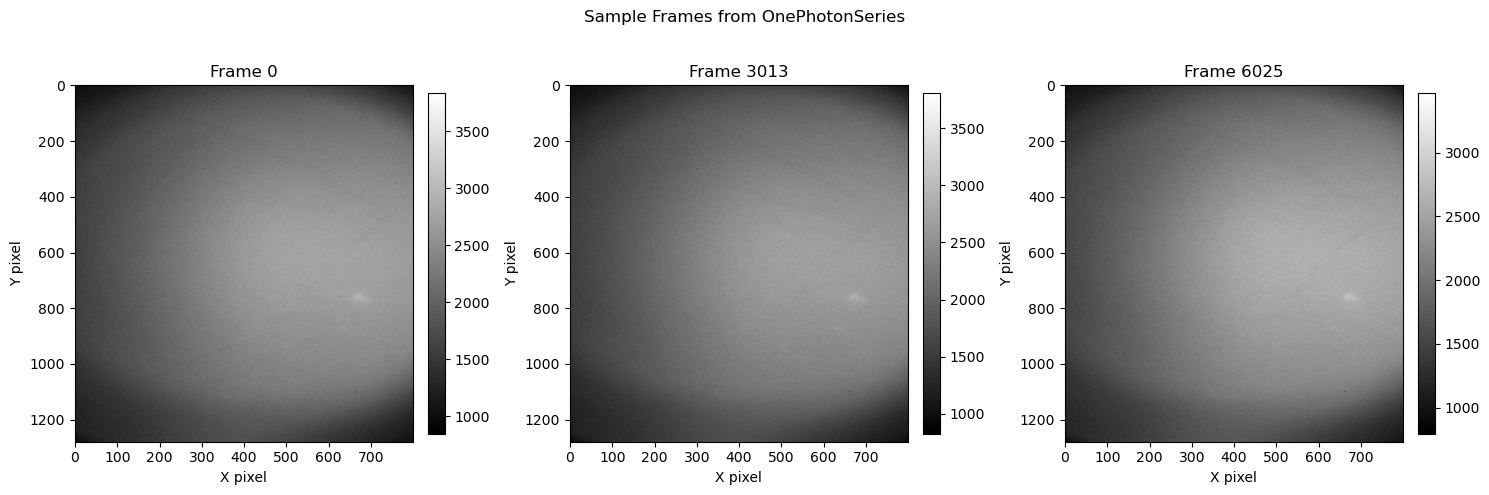

In [3]:
one_photon_series = nwb.acquisition.get("OnePhotonSeries")

if one_photon_series:
    print("OnePhotonSeries found.")
    print(f"Data shape: {one_photon_series.data.shape}") # (time, height, width)
    print(f"Data dtype: {one_photon_series.data.dtype}")
    print(f"Imaging rate: {one_photon_series.rate} Hz")

    # Display a few frames. Let's pick 3 frames spread out in time.
    # Be careful with indexing large remote datasets.
    num_frames_total = one_photon_series.data.shape[0]
    frame_indices_to_show = [0, num_frames_total // 2, num_frames_total - 1]

    # Ensure indices are within bounds if the dataset is very small
    frame_indices_to_show = [min(idx, num_frames_total -1) for idx in frame_indices_to_show if idx < num_frames_total]
    if not frame_indices_to_show and num_frames_total > 0: # if all indices were too large, just show the first
        frame_indices_to_show = [0]
    
    if frame_indices_to_show:
        fig, axes = plt.subplots(1, len(frame_indices_to_show), figsize=(5 * len(frame_indices_to_show), 5))
        if len(frame_indices_to_show) == 1: # if only one frame, axes is not a list
            axes = [axes]
        
        for i, frame_idx in enumerate(frame_indices_to_show):
            # Load a single frame: data[frame_idx, :, :]
            # It's important to load only what's needed from the remote file.
            frame_data = one_photon_series.data[frame_idx, :, :]
            ax = axes[i]
            img = ax.imshow(frame_data, cmap='gray', aspect='auto')
            ax.set_title(f"Frame {frame_idx}")
            ax.set_xlabel("X pixel")
            ax.set_ylabel("Y pixel")
            plt.colorbar(img, ax=ax, fraction=0.046, pad=0.04)
        plt.suptitle("Sample Frames from OnePhotonSeries")
        plt.tight_layout(rect=[0, 0, 1, 0.96]) # Adjust layout to make space for suptitle
        plt.show()
    else:
        print("No frames to display from OnePhotonSeries (dataset might be empty or very small).")
else:
    print("OnePhotonSeries not found in acquisition.")

The plots above show three sample frames from the `OnePhotonSeries` raw imaging data: the first, middle, and last frame. This gives a glimpse into the field of view and the nature of the calcium imaging movie.

#### 3.2 Fluorescence Traces (RoiResponseSeries)

Next, let's look at the fluorescence traces for a few ROIs. This data is typically found in `nwb.processing['ophys']['Fluorescence']['RoiResponseSeries']`.

RoiResponseSeries (Fluorescence) found.
Data shape: (6026, 6)
Data dtype: float32
Sampling rate: 10.0 Hz


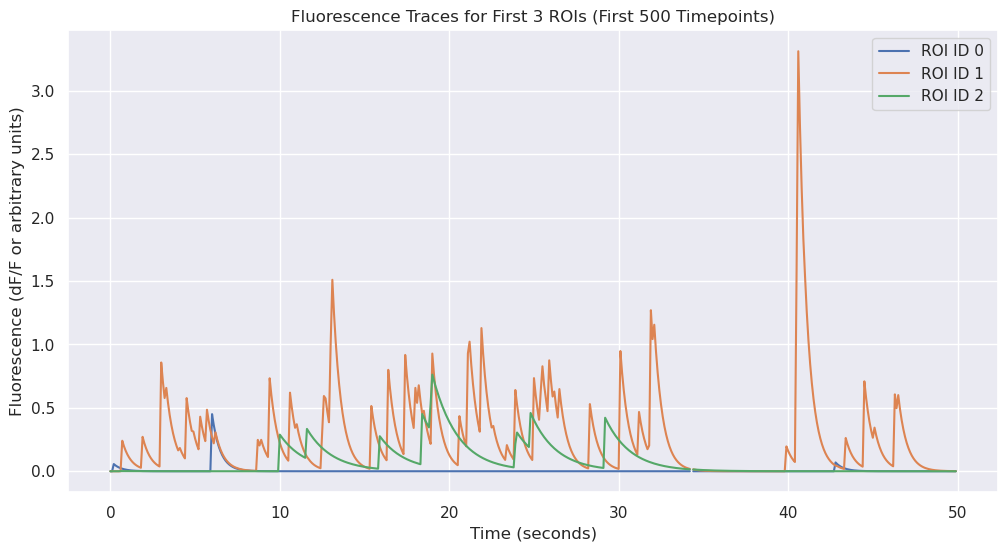

In [4]:
sns.set_theme() # Apply seaborn styling for line plots

fluorescence_module = nwb.processing.get("ophys")
if fluorescence_module and "Fluorescence" in fluorescence_module.data_interfaces:
    roi_response_series_fluorescence = fluorescence_module.data_interfaces["Fluorescence"].roi_response_series.get("RoiResponseSeries")
    if roi_response_series_fluorescence:
        print("RoiResponseSeries (Fluorescence) found.")
        print(f"Data shape: {roi_response_series_fluorescence.data.shape}") # (time, num_rois)
        print(f"Data dtype: {roi_response_series_fluorescence.data.dtype}")
        print(f"Sampling rate: {roi_response_series_fluorescence.rate} Hz")

        num_rois = roi_response_series_fluorescence.data.shape[1]
        rois_to_plot = min(num_rois, 3) # Plot up to 3 ROIs

        if rois_to_plot > 0:
            # Get ROI IDs
            # The rois are linked to a PlaneSegmentation table which has ROI IDs
            plane_segmentation_fluorescence = roi_response_series_fluorescence.rois.table
            roi_ids_fluorescence = plane_segmentation_fluorescence.id[:] # Load all ROI IDs

            # Select some data to plot. Let's take the first 500 time points for the selected ROIs.
            # This avoids loading the entire dataset, which can be large.
            num_timepoints_to_plot = min(500, roi_response_series_fluorescence.data.shape[0])
            
            fluorescence_data_subset = roi_response_series_fluorescence.data[:num_timepoints_to_plot, :rois_to_plot]
            
            # Create a time vector for plotting
            time_vector = np.arange(num_timepoints_to_plot) / roi_response_series_fluorescence.rate

            plt.figure(figsize=(12, 6))
            for i in range(rois_to_plot):
                roi_id = roi_ids_fluorescence[i] if i < len(roi_ids_fluorescence) else f"Index {i}"
                plt.plot(time_vector, fluorescence_data_subset[:, i], label=f"ROI ID {roi_id}")
            
            plt.title(f"Fluorescence Traces for First {rois_to_plot} ROIs (First {num_timepoints_to_plot} Timepoints)")
            plt.xlabel("Time (seconds)")
            plt.ylabel("Fluorescence (dF/F or arbitrary units)")
            plt.legend()
            plt.grid(True)
            plt.show()
        else:
            print("No ROIs to plot in RoiResponseSeries (Fluorescence).")
    else:
        print("RoiResponseSeries (Fluorescence) not found.")
else:
    print("Ophys processing module or Fluorescence data interface not found.")

The plot above shows the fluorescence activity over time for the first few detected ROIs. These traces represent the changes in brightness of individual cells, which are correlated with neural activity. We are showing a subset of the total recording duration (the first 500 timepoints, approximately 50 seconds given a 10Hz sampling rate) to keep the visualization manageable and data loading quick.

#### 3.3 ROI Spatial Footprints (Image Masks)

The `ImageSegmentation` module contains `PlaneSegmentation`, which in turn holds the `image_mask` for each ROI. These masks define the spatial extent of each detected cell. Let's visualize a few of these masks and an overlay.

PlaneSegmentation found.
Number of ROIs in PlaneSegmentation: 6


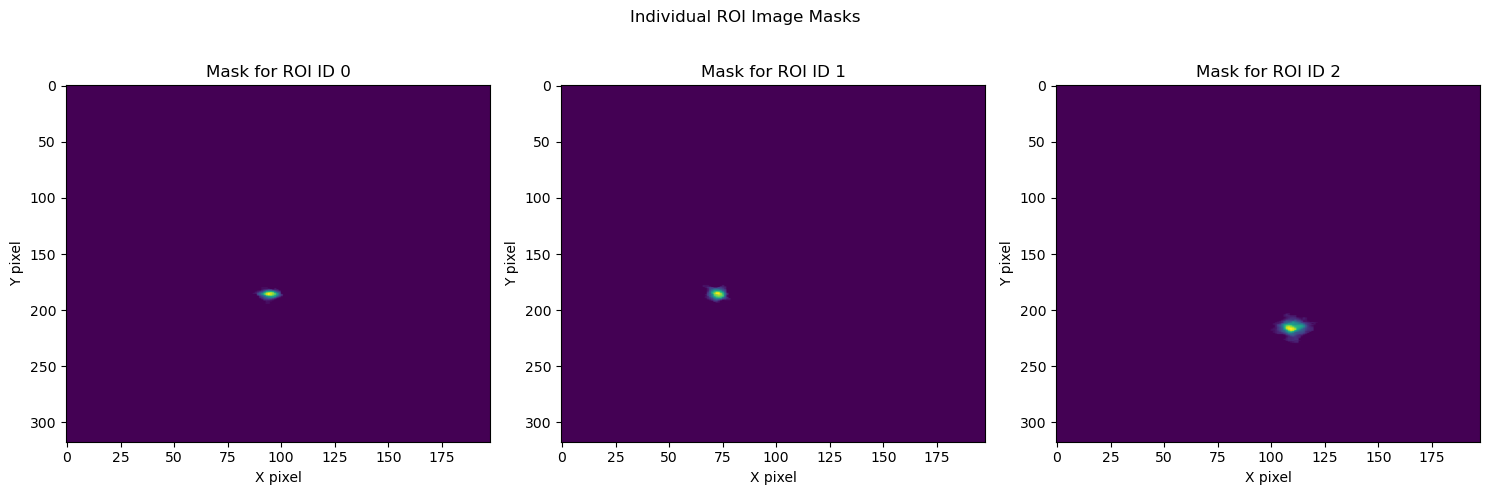

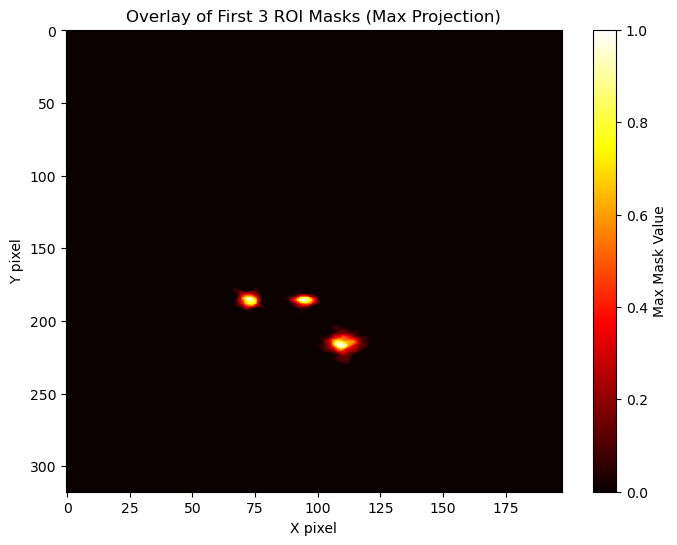

In [5]:
# Revert to default matplotlib style for image plots
plt.style.use('default')

if fluorescence_module and "ImageSegmentation" in fluorescence_module.data_interfaces:
    image_segmentation = fluorescence_module.data_interfaces["ImageSegmentation"]
    if "PlaneSegmentation" in image_segmentation.plane_segmentations:
        plane_segmentation = image_segmentation.plane_segmentations["PlaneSegmentation"]
        print("PlaneSegmentation found.")
        
        roi_ids = plane_segmentation.id[:]
        num_rois_ps = len(roi_ids)
        print(f"Number of ROIs in PlaneSegmentation: {num_rois_ps}")

        if num_rois_ps > 0:
            # Get the image masks. This is a VectorData object where each element is a 2D mask.
            # The shape of each mask is (height, width).
            # We need to access image_mask for each ROI by its index.
            
            rois_to_show_masks = min(num_rois_ps, 3) # Show masks for up to 3 ROIs
            
            fig_masks, axes_masks = plt.subplots(1, rois_to_show_masks, figsize=(5 * rois_to_show_masks, 5))
            if rois_to_show_masks == 1:
                 axes_masks = [axes_masks] # Make it iterable

            all_masks_data = [] # To store masks for overlay

            for i in range(rois_to_show_masks):
                # plane_segmentation['image_mask'][i] should give the mask for the i-th ROI
                # Note: `plane_segmentation.image_mask` is a h5py.Dataset of datasets (ragged array)
                # So we access it as `plane_segmentation['image_mask'][i]` to get the i-th mask data
                mask_data = plane_segmentation['image_mask'][i] 
                all_masks_data.append(mask_data)

                ax = axes_masks[i]
                ax.imshow(mask_data, cmap='viridis', aspect='auto')
                ax.set_title(f"Mask for ROI ID {roi_ids[i]}")
                ax.set_xlabel("X pixel")
                ax.set_ylabel("Y pixel")
            
            plt.suptitle("Individual ROI Image Masks")
            plt.tight_layout(rect=[0, 0, 1, 0.96])
            plt.show()

            # Create an overlay of all loaded masks
            if all_masks_data:
                # Assuming all masks have the same dimensions (height, width)
                # Stack them and take the maximum projection for visualization
                # If masks have different shapes, this would need more careful handling (e.g. padding)
                # For this dataset, masks should have consistent dimensions from the same PlaneSegmentation.
                try:
                    stacked_masks = np.stack(all_masks_data, axis=0)
                    overlay_mask = np.max(stacked_masks, axis=0)
                    
                    plt.figure(figsize=(8, 6))
                    plt.imshow(overlay_mask, cmap='hot', aspect='auto') # 'hot' often works well for overlays
                    plt.title(f"Overlay of First {rois_to_show_masks} ROI Masks (Max Projection)")
                    plt.xlabel("X pixel")
                    plt.ylabel("Y pixel")
                    plt.colorbar(label="Max Mask Value")
                    plt.show()
                except ValueError as e:
                    print(f"Could not stack masks for overlay, likely due to differing shapes: {e}")
                    print("Individual mask shapes:")
                    for i, m in enumerate(all_masks_data):
                        print(f"Mask {i} (ROI ID {roi_ids[i]}): shape {m.shape}")


        else:
            print("No ROIs found in PlaneSegmentation to display masks.")
    else:
        print("PlaneSegmentation not found in ImageSegmentation.")
else:
    print("Ophys processing module or ImageSegmentation data interface not found.")

The figures above display the spatial footprints (image masks) for the first few ROIs. Each mask highlights the pixels corresponding to a detected cell. The final plot shows an overlay of these masks, giving an idea of their relative positions in the field of view. The values in these masks typically range from 0 to 1, indicating the contribution of each pixel to the ROI.

#### 3.4 Event Amplitudes (RoiResponseSeries)

Some NWB files might also contain `EventAmplitude` data, representing detected neural events. Let's check for this and plot if available.

RoiResponseSeries (EventAmplitude) found.
Data shape: (6026, 6)
Data dtype: float64
Sampling rate: 10.003722380947028 Hz


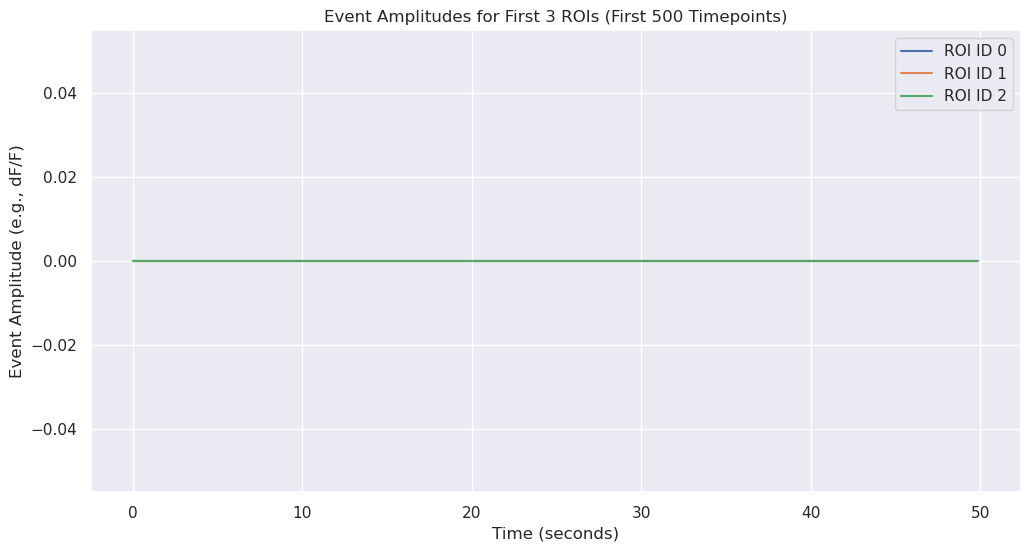

In [6]:
sns.set_theme() # Apply seaborn styling for line plots

if fluorescence_module and "EventAmplitude" in fluorescence_module.data_interfaces:
    roi_response_series_event_amp = fluorescence_module.data_interfaces["EventAmplitude"] # This is already the RoiResponseSeries
    if roi_response_series_event_amp: # Checking if it's not None
        print("RoiResponseSeries (EventAmplitude) found.")
        print(f"Data shape: {roi_response_series_event_amp.data.shape}") # (time, num_rois)
        print(f"Data dtype: {roi_response_series_event_amp.data.dtype}")
        print(f"Sampling rate: {roi_response_series_event_amp.rate} Hz")

        num_rois_ea = roi_response_series_event_amp.data.shape[1]
        rois_to_plot_ea = min(num_rois_ea, 3)

        if rois_to_plot_ea > 0:
            plane_segmentation_event_amp = roi_response_series_event_amp.rois.table
            roi_ids_event_amp = plane_segmentation_event_amp.id[:]

            num_timepoints_to_plot_ea = min(500, roi_response_series_event_amp.data.shape[0])
            event_amp_data_subset = roi_response_series_event_amp.data[:num_timepoints_to_plot_ea, :rois_to_plot_ea]
            
            time_vector_ea = np.arange(num_timepoints_to_plot_ea) / roi_response_series_event_amp.rate

            plt.figure(figsize=(12, 6))
            for i in range(rois_to_plot_ea):
                roi_id_ea = roi_ids_event_amp[i] if i < len(roi_ids_event_amp) else f"Index {i}"
                plt.plot(time_vector_ea, event_amp_data_subset[:, i], label=f"ROI ID {roi_id_ea}")
            
            plt.title(f"Event Amplitudes for First {rois_to_plot_ea} ROIs (First {num_timepoints_to_plot_ea} Timepoints)")
            plt.xlabel("Time (seconds)")
            plt.ylabel("Event Amplitude (e.g., dF/F)")
            plt.legend()
            plt.grid(True)
            plt.show()
        else:
            print("No ROIs to plot in RoiResponseSeries (EventAmplitude).")
    else:
        print("RoiResponseSeries (EventAmplitude) not found or is None.")
else:
    print("Ophys processing module or EventAmplitude data interface not found.")

The plot above shows detected event amplitudes for the first few ROIs, if this data is present in the NWB file. These events often correspond to significant calcium transients, indicative of neural firing. Similar to the fluorescence traces, we are showing a subset of the data.

## 4. Summary and Future Directions

This notebook demonstrated how to:
1.  Connect to the DANDI Archive and retrieve information about a Dandiset.
2.  Load a specific NWB file from the Dandiset using its remote URL.
3.  Inspect the basic metadata and structure of the NWB file.
4.  Access and visualize key data types:
    *   Raw imaging data from `OnePhotonSeries`.
    *   Fluorescence traces from `RoiResponseSeries` under the `Fluorescence` module.
    *   Spatial ROI masks from `PlaneSegmentation` under the `ImageSegmentation` module.
    *   Event amplitudes from `RoiResponseSeries` under the `EventAmplitude` module (if available).

**Future Directions for Analysis:**

Users can expand on this notebook by:
*   Exploring other NWB files within the Dandiset, potentially comparing data across different subjects or sessions.
*   Performing more detailed quantitative analysis of the fluorescence traces, such as event detection, correlation analysis between ROIs, or relating neural activity to behavioral events (if behavior data is available and linked).
*   Analyzing the properties of the ROI masks (e.g., size, shape, distribution).
*   If dealing with data from reaching tasks (as mentioned in the Dandiset description), one could align neural activity to specific task epochs.
*   Exploring the full dataset rather than just subsets, keeping in mind computational and memory constraints, especially when working with remote files.
*   Consulting the original publication associated with the Dandiset for specific hypotheses and analysis methods used by the data creators.

### Closing Remarks

Remember to close the HDF5 file and the remote file connection if you are done with them, especially in scripts, to free up resources. In an interactive notebook session like this, it's often handled when the kernel shuts down, but explicit closing is good practice.

In [7]:
# Clean up: close the NWB I/O, HDF5 file, and remfile
# This is important for releasing file handles and resources.
try:
    io.close()
    # h5_file is managed by NWBHDF5IO, but remfile should be closed if used directly
    # However, h5_file here is the HDF5 file object opened on the remfile.
    # Closing the io object should handle closing h5_file as well.
    # remote_file.close() # If remfile was used to *download* or if h5_file was closed separately
    # In this case, pynwb.NWBHDF5IO takes ownership of the h5py.File object.
    # The h5py.File object holds a reference to the remfile.File object.
    # Closing the NWBHDF5IO object should close the h5py.File object,
    # which in turn should allow the remfile.File object to be garbage collected and closed.
    # Explicitly:
    if hasattr(h5_file, 'close') and callable(h5_file.close):
         if h5_file.id.valid: # Check if file is open before trying to close
            h5_file.close()
    if hasattr(remote_file, 'close') and callable(remote_file.close):
        remote_file.close()
    print("NWB file, HDF5 file, and remote file handles closed (or prepared for garbage collection).")
except Exception as e:
    print(f"Error during cleanup: {e}")

NWB file, HDF5 file, and remote file handles closed (or prepared for garbage collection).


In [8]:
print("Notebook execution completed.")

Notebook execution completed.
